In [1]:
import pandas as pd, numpy as np, glob
from Bio.Seq import Seq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ric8path = '/home/croth/Downloads/B3502/GENES/Stock1/CNN01270-t26_1.csv.gz'
ric8 = pd.read_csv(ric8path,index_col=0)

if ric8.Strand.max()<0:
    ric8 = ric8[::-1]
    
ric8['Zeropos'] = np.abs(ric8.Pos - ric8.Pos.tolist()[0])+1

ric8['Isvar'] = 0
ric8.loc[(ric8.Ref!=ric8.Alt),'Isvar']=1

ric8.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,386823,C,C,0,1,5,-1,CNN01270-t26_1,Stock1,1
1,386824,A,A,0,1,5,-1,CNN01270-t26_1,Stock1,2
2,386825,A,A,0,1,5,-1,CNN01270-t26_1,Stock1,3
3,386826,G,G,0,1,5,-1,CNN01270-t26_1,Stock1,4
4,386827,T,T,0,1,5,-1,CNN01270-t26_1,Stock1,5


In [4]:
ric8.Pos.min(),ric8.Pos.max()

(386823, 389688)

In [3]:
ref = Seq(''.join(ric8[(ric8.Type==0)].Ref.tolist()))
refaa = ref.translate()
list(refaa).count('*'),len(refaa)

(1, 692)

In [4]:
alt = Seq(''.join(ric8[(ric8.Type==0)].Alt.tolist()))
altaa = alt.translate()
list(altaa).count('*'),len(altaa)

(2, 692)

In [5]:
difix = np.min([i for i,j in enumerate(refaa) if j != altaa[i]])
difix

456

In [6]:
na = 3
refaa[difix-na:difix+na],altaa[difix-na:difix+na]

(Seq('RSSEAG'), Seq('RSS*AG'))

In [7]:
snpdf = ric8[(ric8.Isvar!=0)]
snpdf

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
3,388780,G,T,1,1,0,1,CNN01270-t26_1,Stock1,1958


In [8]:
cds = ric8[(ric8.Type==0)].copy()
cds['Refaa'] = np.concatenate([np.repeat(a,3) for a in refaa])
cds['Altaa'] = np.concatenate([np.repeat(a,3) for a in altaa])

In [9]:
cds[(cds.Refaa!=cds.Altaa)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
3,388780,G,T,1,1,0,1,CNN01270-t26_1,Stock1,1958,E,*
1958,388781,A,A,0,1,0,1,CNN01270-t26_1,Stock1,1959,E,*
1959,388782,A,A,0,1,0,1,CNN01270-t26_1,Stock1,1960,E,*


In [10]:
to_plot = cds[(cds.Zeropos>=1958-(3*4)) & (cds.Zeropos<=1957+(3*1)) ]
to_plot

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
1945,388768,G,G,0,1,0,1,CNN01270-t26_1,Stock1,1946,D,D
1946,388769,A,A,0,1,0,1,CNN01270-t26_1,Stock1,1947,D,D
1947,388770,C,C,0,1,0,1,CNN01270-t26_1,Stock1,1948,D,D
1948,388771,C,C,0,1,0,1,CNN01270-t26_1,Stock1,1949,R,R
1949,388772,G,G,0,1,0,1,CNN01270-t26_1,Stock1,1950,R,R
1950,388773,C,C,0,1,0,1,CNN01270-t26_1,Stock1,1951,R,R
1951,388774,T,T,0,1,0,1,CNN01270-t26_1,Stock1,1952,S,S
1952,388775,C,C,0,1,0,1,CNN01270-t26_1,Stock1,1953,S,S
1953,388776,A,A,0,1,0,1,CNN01270-t26_1,Stock1,1954,S,S
0,388777,T,T,0,1,0,1,CNN01270-t26_1,Stock1,1955,S,S


In [11]:
aadf = pd.read_csv('/home/croth/crypto-QTL-paper/DATA/AA_color_df.csv.gz',index_col=0).T
aadf[18] = ['K','tab:blue']
aadf = aadf.T
aadf.tail()

,AA,Color
14,S,#1881DD
15,T,#1A1DE2
16,V,#95CE53
17,Y,#232273
18,K,tab:blue


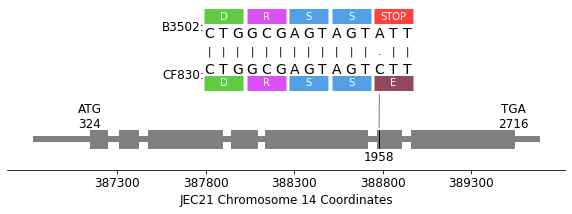

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.set_facecolor('w')
## Plot gene body
plt.hlines(0,ric8.Zeropos.min(),ric8.Zeropos.max(),
           color='grey',linewidth=6);

## Plot introns
#cds = ric8[(ric8.Type==0)]
for i,j in cds.iterrows():
    plt.vlines(j.Zeropos,-1,1,color='grey',
               alpha=1,linewidth=1)
    
## Plot variants  
gvs = ric8[(ric8.Isvar==1)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,-1,1,
                   color='k',linewidth=1)
        
## Plot sequences        
x = 1000
ys = 0.7
y1 = 8
y2 = y1+2.5
tw = 80
xpad = 30

plotpos = []
difpos = []
for i,(ri,p) in enumerate(to_plot.iterrows()):
    
    xp = x+(i*tw)
    plotpos.append(xp)
    plt.text(xp,y=y1+ys,s=Seq(p.Ref).complement(),
             fontsize=14,
             color='k',
             va='top',ha='center')
    
    plt.text(xp,y=y2+ys,s=Seq(p.Alt).complement(),
             fontsize=14,
             color='k',
             va='bottom',ha='center')
    
    plt.text(xp,y=(y1+((y2-y1)/2))+ys+0.02,
             s='|' if p.Alt==p.Ref else '.',
             fontsize=10,
             color='k',
             va='center',ha='center')
    if p.Alt!=p.Ref:
        difpos.append(xp)
    

for i,a in enumerate(to_plot.Refaa.tolist()[::3]):

    plt.hlines(y1-1.6,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y1-1.6,s=a,
             color='w',va='center',ha='center')
    
for i,a in enumerate(to_plot.Altaa.tolist()[::3]):

    plt.hlines(y2+3.4,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y2+3.4,s=a if a != '*' else 'STOP',
             color='w',va='center',ha='center')
    
x_xp,x_xl = plt.xticks()

pos = ric8[(ric8.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=ric8.Zeropos.max())]))].Pos.values
zeropos = ric8[(ric8.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=ric8.Zeropos.max())]))].Zeropos.values

newxmod = int(str(pos[0])[-2:])

plt.xticks(zeropos-newxmod , pos-newxmod ,fontsize=12)
plt.xlabel('JEC21 Chromosome 14 Coordinates',fontsize=12)

plt.text(cds.Zeropos.min()+1,2.5,
         'ATG\n%s'%cds.Zeropos.min(),
         va='center',ha='center',fontsize=12)

plt.text(cds.Zeropos.max()-1,2.5,
         'TGA\n%s'%str(cds.Zeropos.max()-2),
         va='center',ha='center',fontsize=12)

plt.ylim(-3.5,15);
## Turn off top, left and right spines
[ax.spines[a].set_visible(False) for a in ['top','left','right']]
plt.yticks([])

plt.text(850,y1,'CF830:',
         fontsize=12,
         va='top',ha='center')
plt.text(850,y2+1.5,'B3502:',
         fontsize=12,
         va='bottom',ha='center')
plt.text(cds[(cds.Isvar==1)].Zeropos.min(),-2,
         '%s'%cds[(cds.Isvar==1)].Zeropos.min(),
         va='center',ha='center',fontsize=12)

plt.plot([cds[(cds.Isvar==1)].Zeropos.min(),
          np.min(difpos)],[1.3,y1-3],
         color='k',alpha=0.5,linewidth=1)

plt.savefig('../FIGURES/CNN01270_RIC8_B3502.png',
            dpi=200,bbox_inches='tight');

In [13]:
assert np.max([np.unique([len(a) for a in ric8.Ref]),np.unique([len(a) for a in ric8.Alt])])==1

In [14]:
ric8[(ric8.Isvar!=0)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
3,388780,G,T,1,1,0,1,CNN01270-t26_1,Stock1,1958
